In [1]:
import pandas as pd
train_dir='xray_dataset_covid19/train'
test_dir='xray_dataset_covid19/test'

In [2]:
import os
classes_train = os.listdir(train_dir)
classes_test = os.listdir(test_dir)
print(classes_train)
print(classes_test)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    zoom_range=0.2, #the amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1.0/255.0, # Normalize the new images
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1 #Shear angle in counter-clockwise direction in degrees
)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)

Found 148 images belonging to 2 classes.


In [4]:
# Second for Testing data
test_datagen=ImageDataGenerator(
    rescale=1.0/255.0
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)

Found 40 images belonging to 2 classes.


In [5]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization

model=Sequential() 


model.add(Conv2D(32,(5,5),activation='relu',input_shape=(1000,1000,3)))
# 16 is the number of filters, (3,3) it the filter size,acitivation is the activation function and input_shape is the size of the image 
model.add(MaxPooling2D(5,5))
#(2,2) is the pool size 

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(5,5))


model.add(Conv2D(128,(5,5),activation='relu'))
model.add(MaxPooling2D(5,5))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
# 128 is the number of the hideen layers
#model.add(Dropout(0.5))
# Dropout is a function that reducess over fiting by removing random layers every epoch

model.add(Dense(1,activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 996, 996, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 195, 195, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

In [8]:
callbacks = [earlystop, learning_rate_reduction]

In [9]:
model.fit(
    train_generator, 
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/10
5/5 [==============================] - 255s 59s/step - loss: 0.7198 - accuracy: 0.5878 - val_loss: 0.6929 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 255s 60s/step - loss: 0.6870 - accuracy: 0.5000 - val_loss: 0.6735 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 228s 54s/step - loss: 0.6785 - accuracy: 0.5946 - val_loss: 0.6353 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 228s 40s/step - loss: 0.6607 - accuracy: 0.6216 - val_loss: 0.5443 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 227s 53s/step - loss: 0.5349 - accuracy: 0.8716 - val_loss: 0.3024 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 228s 44s/step - loss: 0.5098 - accuracy: 0.7635 - val_loss: 0.1423 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 7/10
5/5 [==============================] - 203s 37s/step - loss: 0.4090 - a

In [10]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.719840,0.587838,0.692886,0.5,0.001
1,0.687020,0.500000,0.673549,0.5,0.001
2,0.678500,0.594595,0.635250,0.5,0.001
3,0.660734,0.621622,0.544310,0.9,0.001
4,0.534936,0.871622,0.302372,0.9,0.001


<AxesSubplot:>

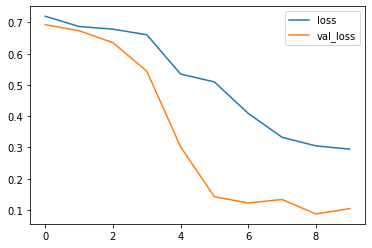

In [11]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

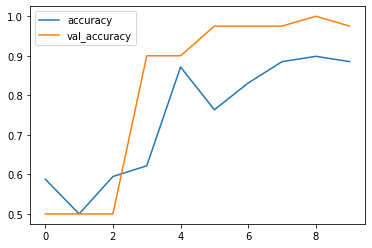

In [12]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

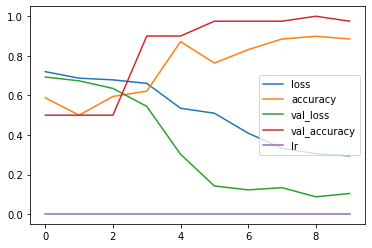

In [13]:
losses.plot()

In [14]:
model.evaluate(test_generator)

2/2 [==============================] - 4s 629ms/step - loss: 0.1042 - accuracy: 0.9750


[0.10423896461725235, 0.9750000238418579]

In [15]:
model_pred=model.predict(test_generator)

2/2 [==============================] - 4s 579ms/step


In [16]:
print(model_pred)

[[4.2674383e-03]
 [1.7447038e-01]
 [9.8319447e-01]
 [4.4605890e-03]
 [2.9563692e-03]
 [4.0315050e-03]
 [7.8922218e-01]
 [2.2464863e-03]
 [9.5287746e-01]
 [7.4181869e-04]
 [1.9426554e-02]
 [2.3359247e-03]
 [6.1756349e-03]
 [9.0892875e-01]
 [9.8622555e-01]
 [9.6785605e-01]
 [3.7419298e-03]
 [9.9431074e-01]
 [9.3770128e-01]
 [9.8412818e-01]
 [4.4849530e-02]
 [9.6343303e-01]
 [8.3213103e-01]
 [8.5779291e-01]
 [8.3995199e-01]
 [3.5896844e-03]
 [1.0502137e-03]
 [6.1929446e-01]
 [9.6027482e-01]
 [4.8933104e-03]
 [7.8384167e-01]
 [6.9784150e-03]
 [2.9399173e-02]
 [6.5628678e-01]
 [9.0583438e-01]
 [5.0271666e-03]
 [8.3357811e-02]
 [9.9712706e-01]
 [2.9316819e-01]
 [1.4000244e-01]]


In [17]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
class_names=['NORMAL','PNEUMONIA']

In [19]:
import matplotlib.pyplot as plt
import numpy as np
def plot_prediction(test_generator, n_images):
    """
    Test the model on random predictions
    Args:
    generator: a generator instance
    n_images : number of images to plot

    """
    i = 1
    images, labels = test_generator.next()
    predictions = np.argmax(model.predict(images), axis=1)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g') 
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r') 
            plt.axis('off')
        i += 1
        if i == n_images:
            break

    plt.show()

1/1 [==============================] - 2s 2s/step


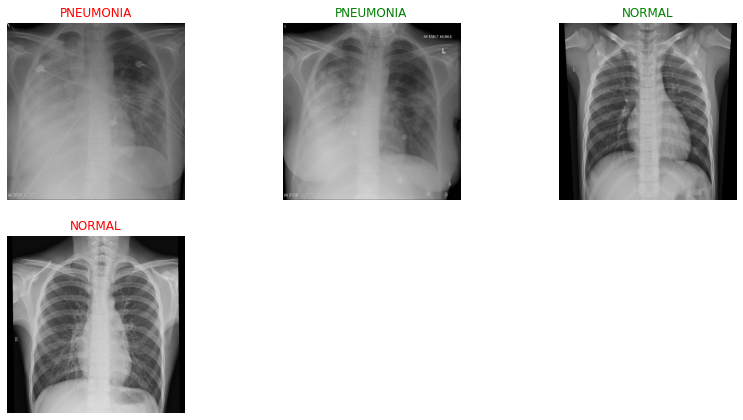

In [20]:
plot_prediction(test_generator,5)